<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework_classification_1_les_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 3. kNN

В уроке мы разобрали построение модели kNN на базовом наборе данных Iris. Для лучшего понимания, как работает алгоритм, мы использовали только два признака - длину и ширину лепестка.

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов.

### 1.
Поочередно добавьте к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [2]:
from sklearn.datasets import load_iris

Напомним порядок расположения признаков в массиве данных

In [3]:
iris_dataset = load_iris()
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков проще воспользоваться не срезами, как мы делали в уроке - iris_dataset.data[:, 2:4] (здесь мы показываем, что выбираем только со 2го по 4й столбец, причем не включая 2й), а просто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [4]:
import numpy as np
import pandas as pd

In [5]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [7]:
iris_dataset_1 = np.delete(iris_dataset['data'], 1, axis=1)
iris_dataset_2 = np.delete(iris_dataset['data'], 0, axis=1)

In [12]:
# для дальнейшего удобства отдельно сохранила список фичей каждого датасета

iris_features_1 = np.delete(iris_dataset['feature_names'], 1, axis=0)
iris_features_2 = np.delete(iris_dataset['feature_names'], 0, axis=0)

### 2.
Теперь посмотрите на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [13]:
# если работаете в интерактивной оболочке IPython
%matplotlib inline

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

**Пример** построения трехмерного графика

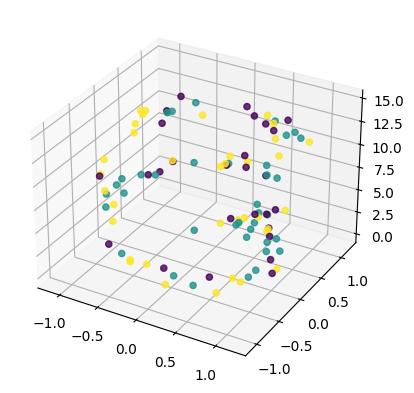

In [14]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используйте *c=iris_dataset.target*.**

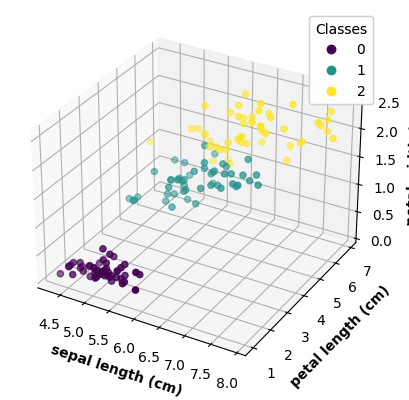

In [21]:
fig = plt.figure()

ax = plt.axes(projection='3d')


scatter = ax.scatter3D(iris_dataset_1[:, 0], iris_dataset_1[:, 1], iris_dataset_1[:, 2], c=iris_dataset.target)
ax.set_xlabel(iris_features_1[0], fontweight ='bold')
ax.set_ylabel(iris_features_1[1], fontweight ='bold')
ax.set_zlabel(iris_features_1[2], fontweight ='bold')

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
# 0 - setosa, 1 - versicolor, 2 - virginica

ax.add_artist(legend1)

plt.show()

# как уместить боковую надпись?

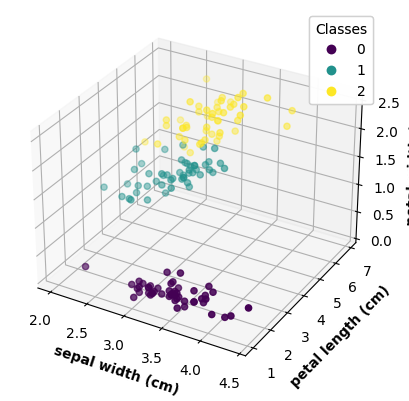

In [22]:
fig = plt.figure()

ax = plt.axes(projection='3d')


scatter = ax.scatter3D(iris_dataset_2[:, 0], iris_dataset_2[:, 1], iris_dataset_2[:, 2], c=iris_dataset.target)
ax.set_xlabel(iris_features_2[0], fontweight ='bold')
ax.set_ylabel(iris_features_2[1], fontweight ='bold')
ax.set_zlabel(iris_features_2[2], fontweight ='bold')

legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
# 0 - setosa, 1 - versicolor, 2 - virginica

ax.add_artist(legend1)

plt.show()

# как уместить боковую надпись?

### 3.
С помощью функции sklearn.model_selection.train_test_split разделите данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [24]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1,
                                                    iris_dataset['target'],
                                                    random_state=17)



x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2,
                                                    iris_dataset['target'],
                                                    random_state=17)


In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model_1 = knn.fit(x_train_1, y_train_1)
knn_model_2 = knn.fit(x_train_2, y_train_2)

In [26]:
knn_predictions_1 = knn.predict(x_test_1)
knn_predictions_2 = knn.predict(x_test_2)

### 4.
Проверьте точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9736842105263158, accuracy_2: 0.9736842105263158


Результат в целом такой же, если округлять до двух знаков.

### 5.
Постройте модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [34]:
accuracy_dict = dict()

for n in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn_model = knn.fit(x_train_1, y_train_1)
  knn_predictions = knn.predict(x_test_1)
  accuracy = accuracy_score(y_test_1, knn_predictions)
  accuracy_dict[n] = accuracy

# Находим максимальное значение
max_value = max(accuracy_dict.values())

# Находим все ключи, соответствующие максимальному значению
max_keys = [key for key, value in accuracy_dict.items() if value == max_value]
print(f'Максимальное значение accuracy: {max_value} при N = {max_keys}')

Максимальное значение accuracy: 0.9736842105263158 при N = [1, 2, 3, 5, 11, 15]
